<a href="https://colab.research.google.com/github/b-paramesh/Hierachical_Clustering/blob/main/Day_25_DBScan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


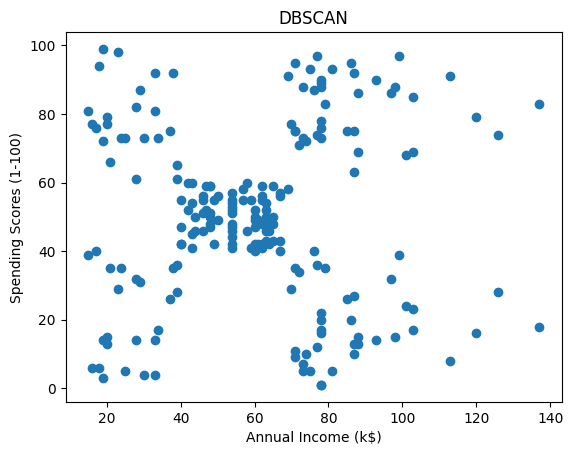

/tmp/ipython-input-837766944.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


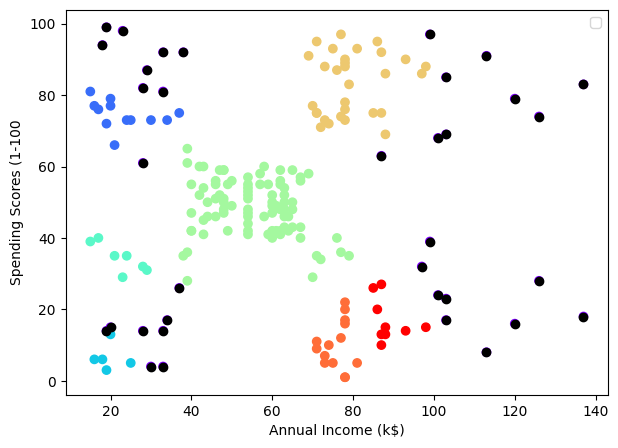

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from google.colab import drive
drive.mount("/content/drive")
path="/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv"
df=pd.read_csv(path)
df.head()
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'])
plt.title("DBSCAN")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Scores (1-100)")
plt.show()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled
#
dbscan=DBSCAN(eps=0.3,min_samples=5)
clusters=dbscan.fit_predict(X_scaled)
plt.figure(figsize=(7,5))
plt.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'],c=clusters,cmap="rainbow")
plt.scatter(X.iloc[clusters==-1]['Annual Income (k$)'],X.iloc[clusters==-1]['Spending Score (1-100)'],c = 'black')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Scores (1-100")
plt.legend()
plt.show()


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

eps_values = [0.2, 0.3, 0.5]

for eps in eps_values:
    print(f"\nEvaluating DBSCAN using eps = {eps}")

    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X_scaled)

    unique_labels = set(labels)
    n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

    n_noise = list(labels).count(-1)
    noise_ratio = n_noise / len(labels)

    print(f"Number of Clusters: {n_clusters}")
    print(f"Number of Noise Points: {n_noise}")
    print(f"Noise Ratio: {round(noise_ratio, 2)}")

    # Silhouette score only if more than 1 cluster
    if n_clusters > 1:
        score = silhouette_score(X_scaled, labels)
        print(f"Silhouette Score: {round(score, 3)}")
    else:
        print("Silhouette Score: Not applicable (less than 2 clusters)")



Evaluating DBSCAN using eps = 0.2
Number of Clusters: 7
Number of Noise Points: 77
Noise Ratio: 0.39
Silhouette Score: 0.141

Evaluating DBSCAN using eps = 0.3
Number of Clusters: 7
Number of Noise Points: 35
Noise Ratio: 0.17
Silhouette Score: 0.316

Evaluating DBSCAN using eps = 0.5
Number of Clusters: 2
Number of Noise Points: 8
Noise Ratio: 0.04
Silhouette Score: 0.35


1️⃣ Load the Dataset
Load the CSV file into a pandas DataFrame.
Display the first 5 rows of the dataset.
2️⃣ Feature Selection
Extract the following columns:
pickup_latitude
pickup_longitude
Store them in a variable named X.
3️⃣ Data Preprocessing
Apply StandardScaler to scale the selected features.
Store the scaled data in X_scaled.
4️⃣ DBSCAN Model – Experiment 1
Apply DBSCAN with:
eps = 0.2
min_samples = 5
Store cluster labels in labels_1.
5️⃣ DBSCAN Model – Experiment 2
Apply DBSCAN with:
eps = 0.3
min_samples = 5
Store cluster labels in labels_2.
6️⃣ DBSCAN Model – Experiment 3
Apply DBSCAN with:
eps = 0.5
min_samples = 5
Store cluster labels in labels_3.
7️⃣ Cluster Evaluation
For each experiment:
Print:
Number of clusters (excluding noise)
Number of noise points
Noise ratio
8️⃣ Silhouette Score Calculation
Remove noise points (-1) from each experiment.
Calculate and print the Silhouette Score for:
Experiment 1
Experiment 2
Experiment 3
If silhouette score is not applicable, print "Not Applicable".
9️⃣ Visualization
For each experiment:
Plot pickup locations using a scatter plot.
Color points based on cluster labels.
Highlight noise points using a separate color.
🔟 Best Model Selection
Based on:
Number of clusters
Noise ratio
Silhouette score
Print:
Best eps value = ___

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount("/content/drive")

df=pd.read_csv(path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
df.shape

(1458644, 11)

In [ ]:
df.isna().sum()

,0
id,0
vendor_id,0
pickup_datetime,0
dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
store_and_fwd_flag,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
id,0
vendor_id,0
pickup_datetime,0
dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
store_and_fwd_flag,0


In [ ]:
X=df[['pickup_latitude','pickup_longitude']]
X
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[ 0.51749362, -0.12226117],
       [-0.37581901, -0.09772722],
       [ 0.39591029, -0.07814311],
       ...,
       [ 0.54371292,  0.20249083],
       [-0.05654676, -0.12118512],
       [ 0.93758258, -0.08535264]])

In [ ]:
# ============================================
# 1️⃣ Load the Dataset
# ============================================

from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

drive.mount('/content/drive')

path="/content/drive/MyDrive/Colab Notebooks/NewYorkCityTaxiTripDuration.csv"  # ← update path
df = pd.read_csv(path)

print("First 5 Rows:")
print(df.head())


# ============================================
# 2️⃣ Feature Selection
# ============================================

X = df[['pickup_latitude', 'pickup_longitude']]
print("\nSelected Features:")
print(X.head())


# ============================================
# 3️⃣ Data Preprocessing
# ============================================

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# ============================================
# Helper Function for Evaluation
# ============================================

def evaluate_dbscan(labels, X_scaled, experiment_name):
    print(f"\n--- {experiment_name} ---")

    unique_labels = set(labels)
    n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
    n_noise = list(labels).count(-1)
    noise_ratio = n_noise / len(labels)

    print("Number of clusters:", n_clusters)
    print("Number of noise points:", n_noise)
    print("Noise ratio:", round(noise_ratio, 3))

    # Remove noise for silhouette
    mask = labels != -1

    if n_clusters > 1 and sum(mask) > 0:
        score = silhouette_score(X_scaled[mask], labels[mask])
        print("Silhouette Score:", round(score, 3))
        return score, noise_ratio, n_clusters
    else:
        print("Silhouette Score: Not Applicable")
        return None, noise_ratio, n_clusters


# ============================================
# 4️⃣ DBSCAN – Experiment 1 (eps=0.2)
# ============================================

db1 = DBSCAN(eps=0.2, min_samples=5)
labels_1 = db1.fit_predict(X_scaled)

score1, noise1, cluster1 = evaluate_dbscan(labels_1, X_scaled, "Experiment 1 (eps=0.2)")


# ============================================
# 5️⃣ DBSCAN – Experiment 2 (eps=0.3)
# ============================================

db2 = DBSCAN(eps=0.3, min_samples=5)
labels_2 = db2.fit_predict(X_scaled)

score2, noise2, cluster2 = evaluate_dbscan(labels_2, X_scaled, "Experiment 2 (eps=0.3)")


# ============================================
# 6️⃣ DBSCAN – Experiment 3 (eps=0.5)
# ============================================

db3 = DBSCAN(eps=0.5, min_samples=5)
labels_3 = db3.fit_predict(X_scaled)

score3, noise3, cluster3 = evaluate_dbscan(labels_3, X_scaled, "Experiment 3 (eps=0.5)")


# ============================================
# 9️⃣ Visualization
# ============================================

def plot_clusters(X, labels, title):
    plt.figure(figsize=(6,5))

    unique_labels = set(labels)

    for label in unique_labels:
        if label == -1:
            color = 'black'
            label_name = "Noise"
        else:
            color = None
            label_name = f"Cluster {label}"

        mask = labels == label
        plt.scatter(
            X[mask, 1],  # longitude
            X[mask, 0],  # latitude
            label=label_name,
            s=10,
            c=color
        )

    plt.title(title)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend()
    plt.show()


plot_clusters(X_scaled, labels_1, "DBSCAN eps=0.2")
plot_clusters(X_scaled, labels_2, "DBSCAN eps=0.3")
plot_clusters(X_scaled, labels_3, "DBSCAN eps=0.5")


# ============================================
# 🔟 Best Model Selection
# ============================================

results = [
    (0.2, score1, noise1, cluster1),
    (0.3, score2, noise2, cluster2),
    (0.5, score3, noise3, cluster3),
]

best_eps = None
best_score = -1

for eps, score, noise, clusters in results:
    if score is not None and score > best_score:
        best_score = score
        best_eps = eps

print("\n============================")
print("Best eps value =", best_eps)
print("============================")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
First 5 Rows:
          id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         